# Practice ML with Scikit-Learn

In [1]:
%pip install seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Simple regression and classification

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


d:\Programming Train\ml_train\.venv\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


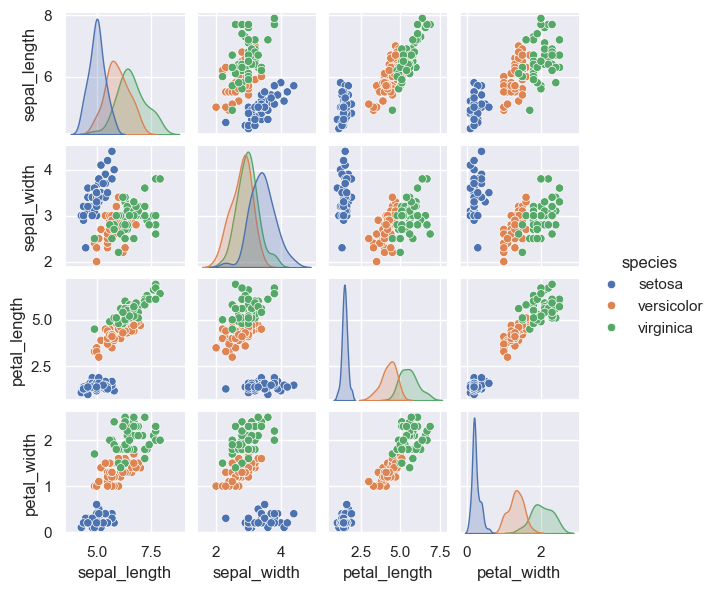

In [3]:
sns.set()
sns.pairplot(iris, hue="species", size=1.5)

In [4]:
X_iris = iris.drop("species", axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris["species"]
y_iris.shape

(150,)

### Simple linear regression

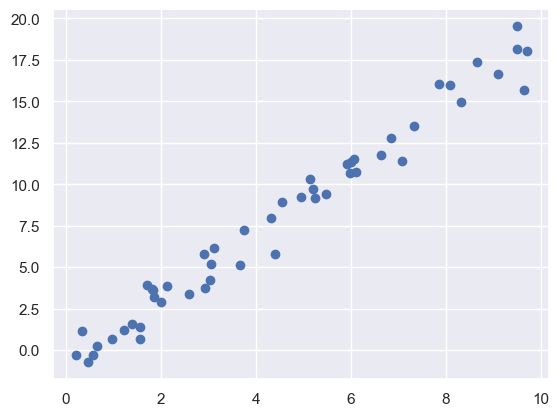

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
print(model.coef_, model.intercept_)

[1.9776566] -0.903310725531111


In [12]:
xfit = np.linspace(-1, 11)


In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

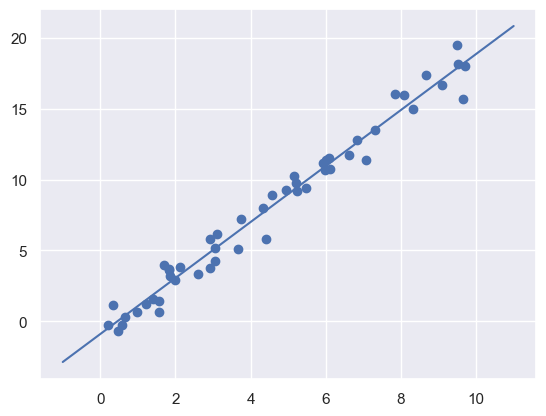

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [15]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=42)

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

1.0

### PCA Iris dataset

In [18]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)

X_2D = model.transform(X_iris)

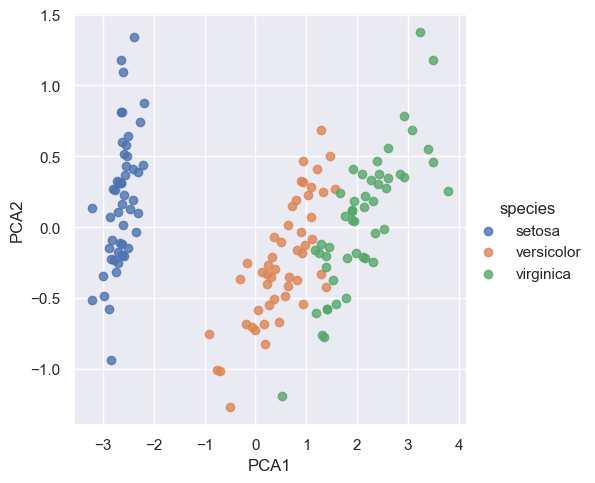

In [19]:
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue="species", data=iris, fit_reg=False)

### Gaussian mixture model (GMM)

In [20]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type="full")

model.fit(X_iris)

y_gaussian_mixture = model.predict(X_iris)

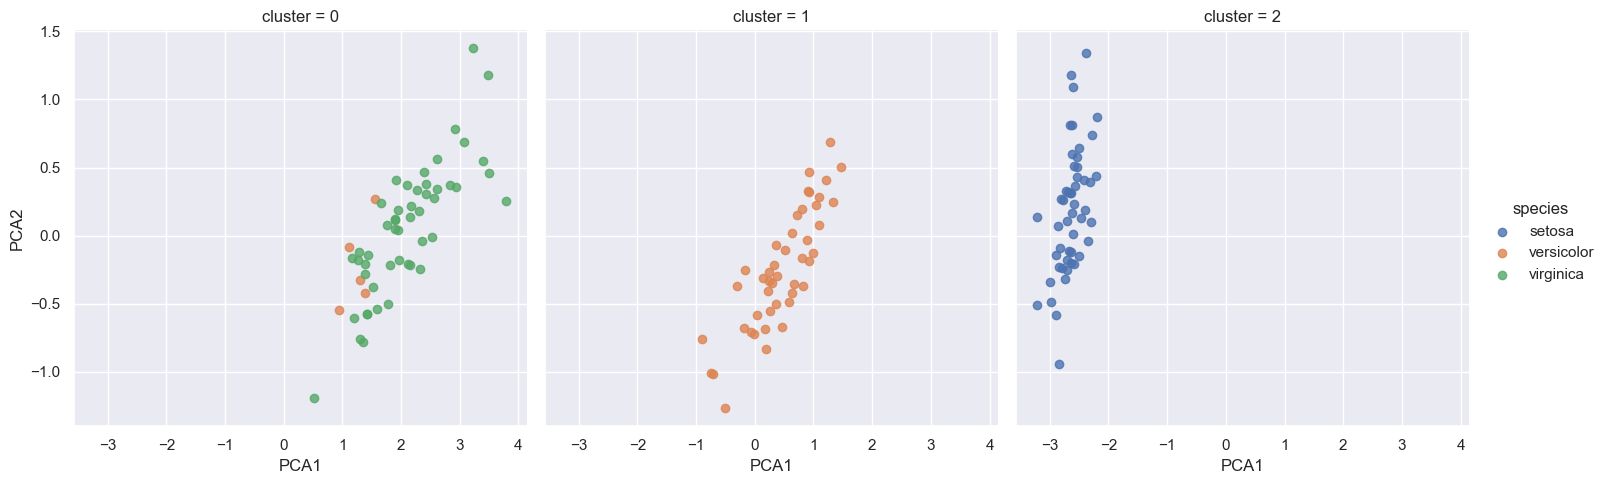

In [21]:
iris["cluster"] = y_gaussian_mixture
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue="species", col="cluster", fit_reg=False)


### Handwritten digits analysis

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

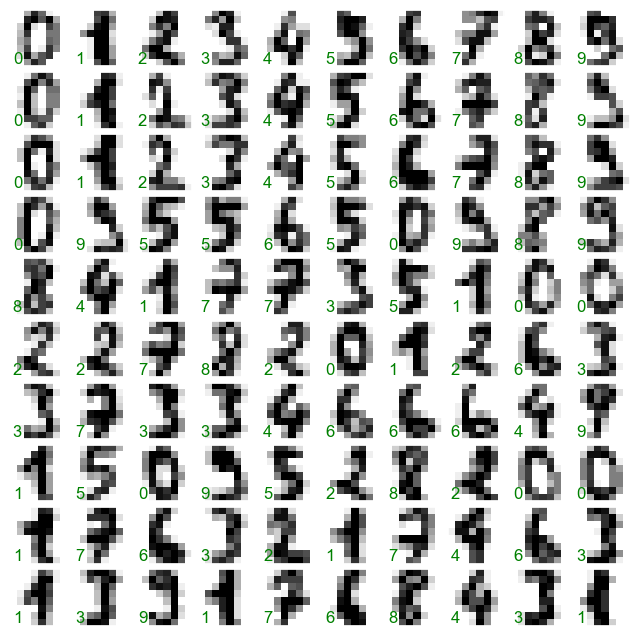

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color="green")


In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

### Dimension lowering

In [26]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

d:\Programming Train\ml_train\.venv\lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Programming Train\ml_train\.venv\lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

C:\Users\aleks\AppData\Local\Temp\ipykernel_11228\980111559.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("Spectral", 10))


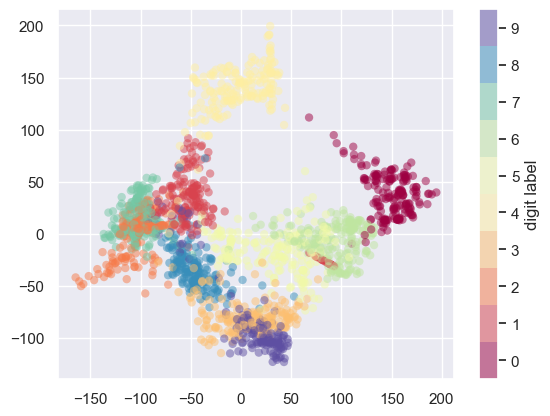

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
            c=digits.target, edgecolor="none", alpha=0.5,
            cmap=plt.cm.get_cmap("Spectral", 10))
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5)

### Digits classification

In [28]:
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.8555555555555555

Text(110.44999999999997, 0.5, 'true value')

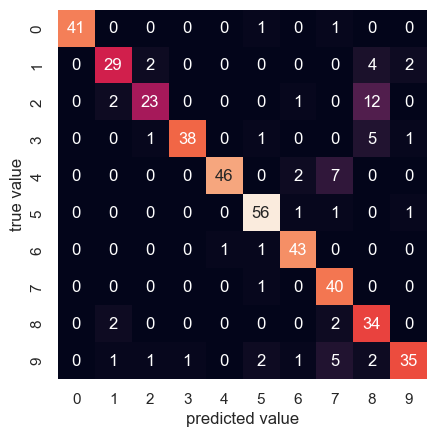

In [31]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, prediction)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")

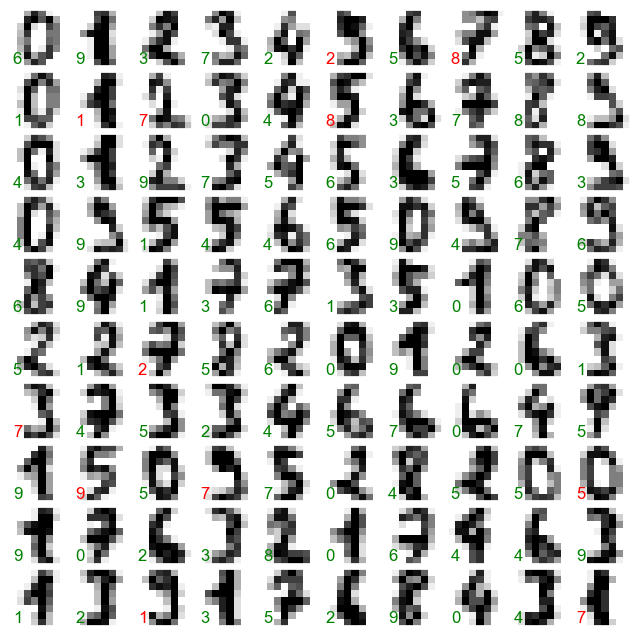

In [32]:
# Another method to get info with model characteristics is to plot 
# input data alongside prediction

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary",
              interpolation="nearest")
    ax.text(0.05, 0.05, str(prediction[i]),
            transform=ax.transAxes,
            color="green" if (y_test[i] == prediction[i]) else "red")

## Hyperparameters and model check

### Model check

In [33]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=42, train_size=0.6)
model.fit(X1, y1)

pred_2 = model.predict(X2)
accuracy_score(y2, pred_2)

0.8317107093184979

### Cross validation

In [34]:
y2_pred = model.fit(X1, y1).predict(X2)
y1_pred = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_pred), accuracy_score(y2, y2_pred)

(0.8487940630797773, 0.8317107093184979)

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [36]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 0., ..., 1., 1., 1.])

In [37]:
scores.mean()

0.8408458542014469

### Choosing an optimal model

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


In [39]:
import numpy as np

def make_data(N, err=1.0, rseed=42):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y


X, y = make_data(60)

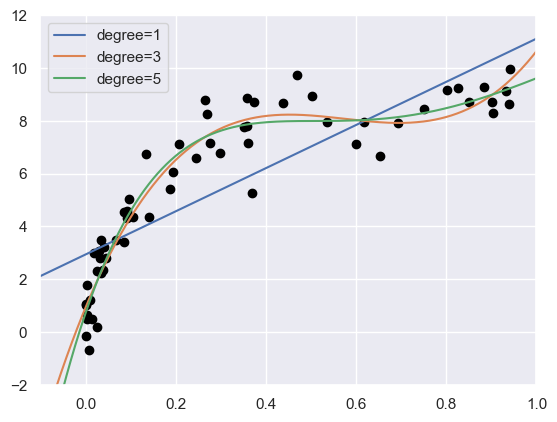

In [40]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label="degree={0}".format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")

Text(0, 0.5, 'score')

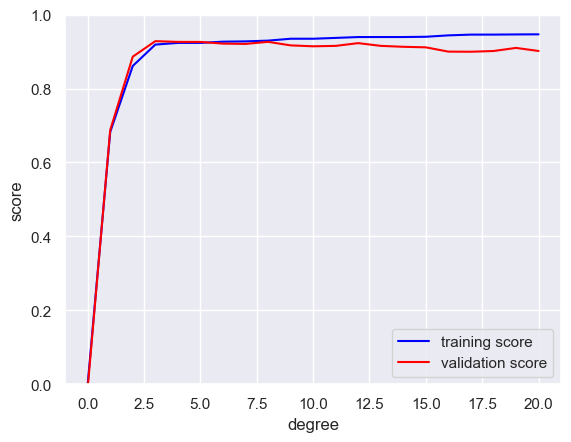

In [41]:
# check model with validation curve

from sklearn.model_selection import validation_curve


degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name="polynomialfeatures__degree",
                                          param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

(-0.04659134859036047,
 0.9877401913166761,
 -1.2221263632327752,
 10.503389604420432)

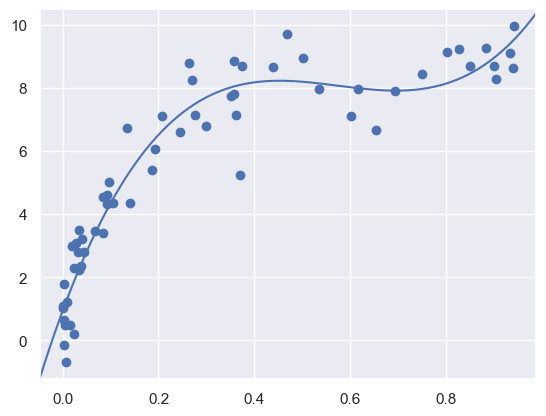

In [42]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

### Learning curves

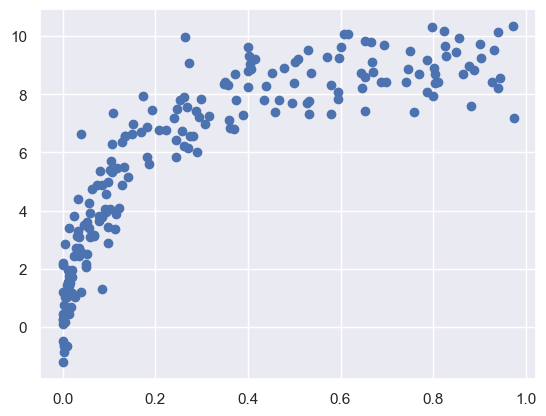

In [43]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [47]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            param_name="polynomialfeatures__degree",
                                            param_range=degree, cv=7)

Text(0, 0.5, 'score')

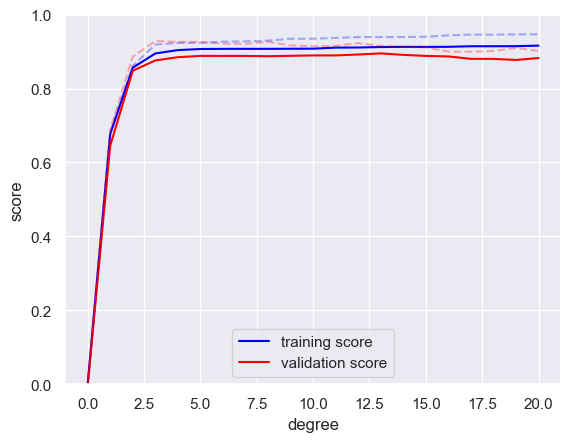

In [49]:
plt.plot(degree, np.median(train_score2, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score2, 1), color="red", label="validation score")

plt.plot(degree, np.median(train_score, 1), color="blue", alpha=0.3, linestyle="dashed")
plt.plot(degree, np.median(val_score, 1), color="red", alpha=0.3, linestyle="dashed")
plt.legend(loc="lower center")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

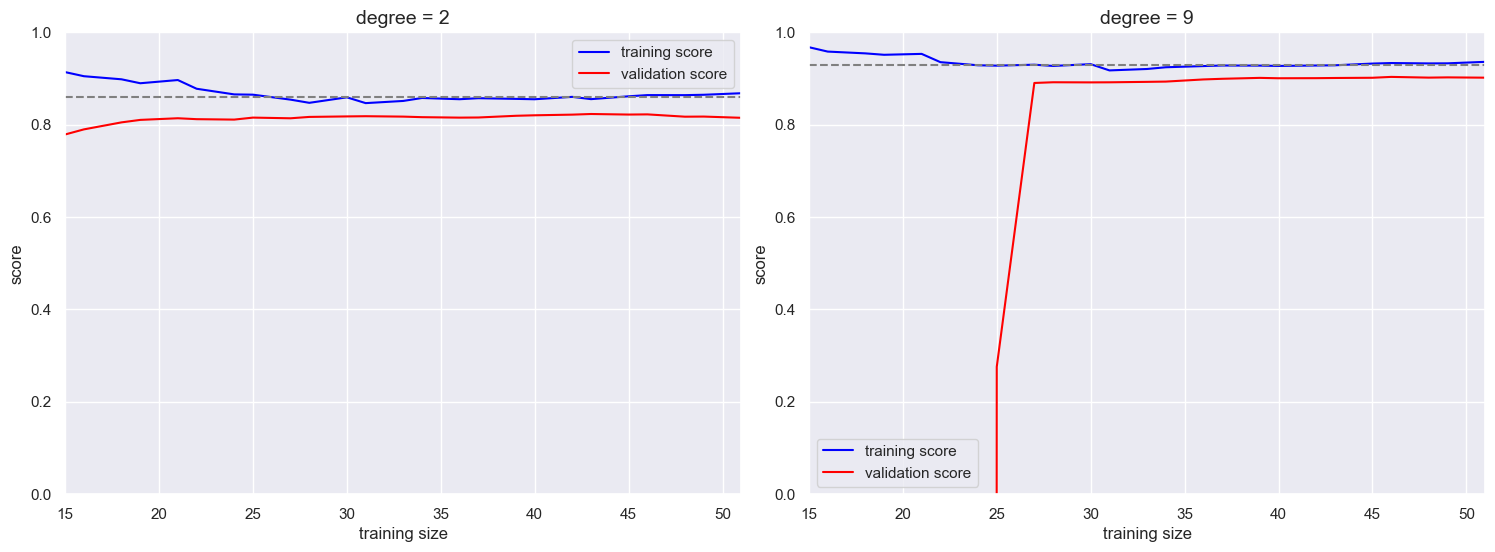

In [51]:
# Learning curves in scikit-learn
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color="blue", label="training score")
    ax[i].plot(N, np.mean(val_lc, 1), color="red", label="validation score")
    ax[i].hlines(np.mean([train_lc[1], val_lc[-1]]), N[0], N[-1], color="gray", linestyle="dashed")
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel("training size")
    ax[i].set_ylabel("score")
    ax[i].set_title("degree = {0}".format(degree), size=14)
    ax[i].legend(loc="best")

### Practice: grid search

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {"polynomialfeatures__degree": np.arange(21),
              "linearregression__fit_intercept": [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid=param_grid, cv=7)

In [55]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [56]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 9}

(-0.04659134859036047,
 0.9877401913166761,
 -1.2221263632327752,
 10.503389604420432)

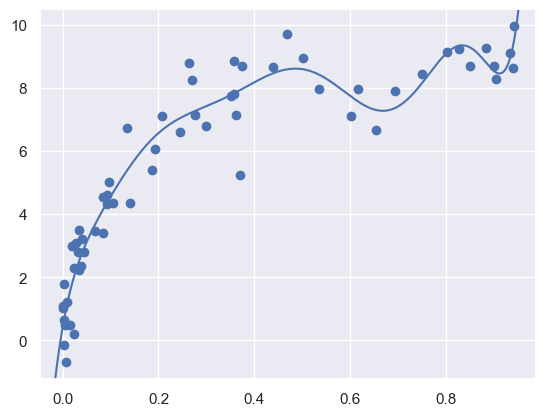

In [58]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)